In [1]:
import os
from qiskit import *
import qiskit.tools.visualization as qt
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(5, 'c')

circuit_c = QuantumCircuit(qreg_q, creg_c)
circuit_b = QuantumCircuit(qreg_q, creg_c)

In [3]:
for i in range(0, 5):
    if(i == 4):
        circuit_c.x(qreg_q[i])
    else:
        circuit_c.reset(qreg_q[i])
        
circuit_c.barrier()

for i in range(0, 5):
    circuit_c.h(qreg_q[i])
    circuit_c.x(qreg_q[i])
    circuit_c.h(qreg_q[i])
    
circuit_c.barrier()

for i in range(0, 4):
    circuit_c.measure(qreg_q[i], creg_c[i])

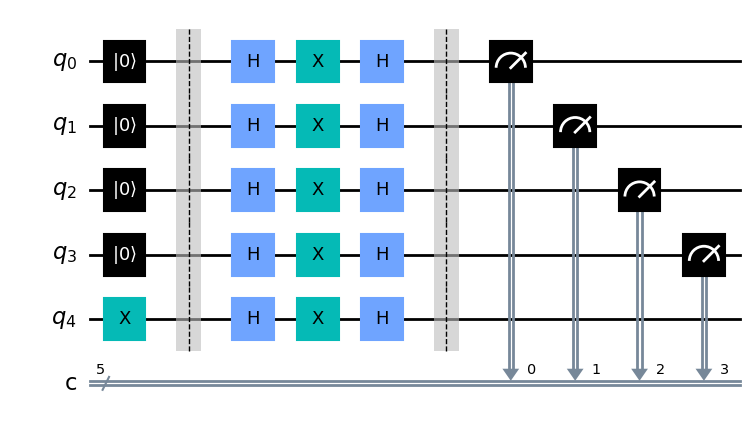

In [4]:
circuit_c.draw(output='mpl')

In [5]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit_c, backend = simulator, shots = 1).result()
counts1 = result.get_counts()
print(counts1)

{'00000': 1}


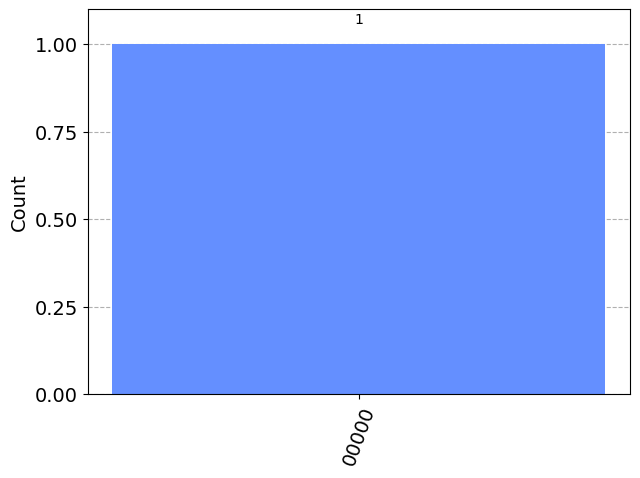

In [6]:
qt.plot_histogram(counts1)

In [7]:
for i in range(0, 5):
    if(i == 4):
        circuit_b.x(qreg_q[i])
    else:
        circuit_b.reset(qreg_q[i])
        
circuit_b.barrier()

for i in range(0, 5):
    circuit_b.h(qreg_q[i])
    
for i in range(0, 5):
    if(i == 3):
        circuit_b.cx(qreg_q[i], qreg_q[i + 1])
    elif(i != 4):
        circuit_b.x(qreg_q[i])
        
for i in range(0, 5):
    circuit_b.h(qreg_q[i])
    
circuit_b.barrier()
    
# for i in range(0, 4):
#     circuit_b.measure(qreg_q[i], creg_c[i])
circuit_b.measure(qreg_q[4], creg_c[4])

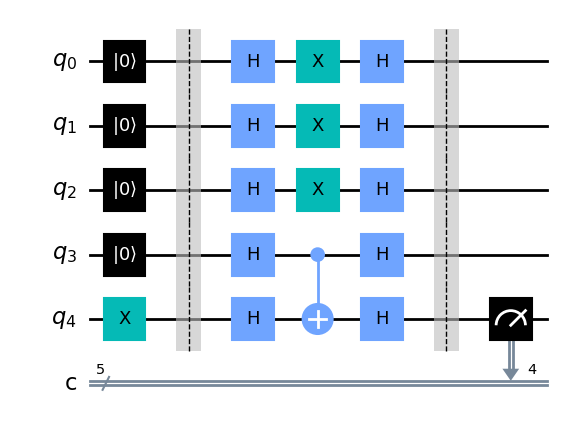

In [8]:
circuit_b.draw(output='mpl')

In [11]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit_b, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'10000': 1}


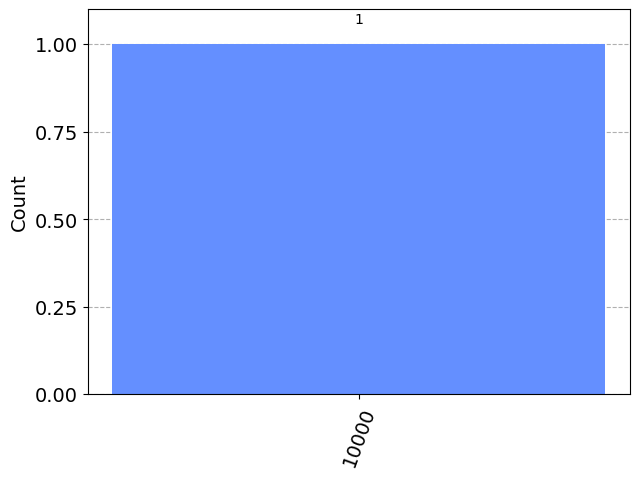

In [12]:
qt.plot_histogram(counts)